# Problem 1 编写代码 广义逆 梯度下降法

In [ ]:
import numpy as np

class Gradient_Decent_Model:
    def __init__(self,X_train,Y_train,X_test,Y_test,eta) -> None:
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
        self.N = X_train.shape[0]
        self.d = X_train.shape[1]
        self.W = np.ones((self.d,))
        self.eta = eta
        self.loss = []
    def suffle(self):
        train_size = self.X_train.shape[0]
        permutation = np.random.permutation(train_size)
        self.X_train = self.X_train[permutation]
        self.Y_train = self.Y_train[permutation]
    def train_batch(self,index,batch_size):
        X = self.X_train[index:index+batch_size]
        Y = self.Y_train[index:index+batch_size]
        gradient = 2.0 / batch_size * (X.T.dot(X).dot(self.W) - X.T.dot(Y))
        # 梯度下降
        self.W = self.W - self.eta * gradient
    def train(self,epoch,batch_size,has_log):
        for epoch_i in range(1,epoch+1):
            self.suffle()
            for index in range(0,self.N,batch_size):
                self.train_batch(index,batch_size)
            if has_log:
                print("epoch = " + str(epoch_i) + "  W = ",end='')
                print(self.W)
            # Loss
            E = self.X_train.dot(self.W) - self.Y_train
            loss = 1.0 / self.N * np.linalg.norm(E) * np.linalg.norm(E)
            if has_log:
                print("Loss = " + str(loss))
            self.loss.append(loss)
        # 计算accuracy
        predict = np.sign(self.X_train.dot(self.W))
        miss_predict = np.absolute(predict - self.Y_train)
        error_number = np.count_nonzero(miss_predict)
        accuracy = 1 - error_number / self.N
        print("Accuracy = " + str(accuracy))
        return self.W
    def test(self):
        print("Test Result:")
        N = self.X_test.shape[0]
        E = self.X_test.dot(self.W) - self.Y_test
        # 计算Loss
        loss = 1.0 / N * np.linalg.norm(E) * np.linalg.norm(E)
        print("Loss = " + str(loss))
        # 计算accuracy
        predict = np.sign(self.X_test.dot(self.W))
        miss_predict = np.absolute(predict - self.Y_test)
        error_number = np.count_nonzero(miss_predict)
        accuracy = 1 - error_number / N
        print("Accuracy = " + str(accuracy))
    def gerneral_inverse(self):
        x_dagger = np.linalg.pinv(self.X_train)
        W = x_dagger.dot(self.Y_train)
        print("Generalized Inverse Test Result:")
        N = self.X_test.shape[0]
        E = self.X_test.dot(W) - self.Y_test
        # 计算Loss
        loss = 1.0 / N * np.linalg.norm(E) * np.linalg.norm(E)
        print("Loss = " + str(loss))
        # 计算accuracy
        predict = np.sign(self.X_test.dot(W))
        miss_predict = np.absolute(predict - self.Y_test)
        error_number = np.count_nonzero(miss_predict)
        accuracy = 1 - error_number / N
        print("W = ",end='')
        print(W)
        print("Accuracy = " + str(accuracy))
        return W

def gen_data(u10,sigma10,u11,sigma11,u20,sigma20,u21,sigma21,n : int = 200):
    # 协方差矩阵等于单位矩阵 <=> 独立
    x1_0 = np.random.normal(u10,sigma10,n).reshape(n,1)
    x1_1 = np.random.normal(u11,sigma11,n).reshape(n,1)
    x1_2 = np.ones((n,1))
    x1 = np.concatenate((x1_0,x1_1,x1_2),axis=1)
    y1 = np.ones((n,))
    x2_0 = np.random.normal(u20,sigma20,n).reshape(n,1)
    x2_1 = np.random.normal(u21,sigma21,n).reshape(n,1)
    x2_2 = np.ones((n,1))
    x2 = np.concatenate((x2_0, x2_1,x2_2), axis=1)
    y2 = - np.ones(n,)
    train_set_x = np.concatenate((x1[0:int(0.8 * n),],x2[0:int(0.8 * n),]))
    train_set_y = np.concatenate((y1[0:int(0.8 * n),],y2[0:int(0.8 * n),]))
    test_set_x = np.concatenate((x1[int(0.8 * n):,],x2[int(0.8 * n):,]))
    test_set_y = np.concatenate((y1[int(0.8 * n):, ], y2[int(0.8 * n):, ]))
    return (train_set_x,train_set_y,test_set_x,test_set_y)


# Problem 2 产生数据&实验

In [ ]:
train_set_x,train_set_y,test_set_x,test_set_y = gen_data(-5,1,0,1,0,1,5,1)
model = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model.train(100,20,1)
model.test()

epoch = 1  W = [0.64558012 0.51767342 0.9707985 ]
Loss = 16.370859478507338
epoch = 2  W = [0.41438666 0.20637112 0.95142538]
Loss = 6.9455060999573695
epoch = 3  W = [0.263602   0.00559805 0.9384728 ]
Loss = 2.9946672539375108
epoch = 4  W = [ 0.16462662 -0.12301718  0.92970467]
Loss = 1.3411308462863853
epoch = 5  W = [ 0.10007924 -0.20597188  0.92342958]
Loss = 0.6471312280915206
epoch = 6  W = [ 0.05819391 -0.25972857  0.91857982]
Loss = 0.35544859428717135
epoch = 7  W = [ 0.03106832 -0.2939502   0.91468511]
Loss = 0.23396336111695054
epoch = 8  W = [ 0.01244487 -0.31608556  0.91160057]
Loss = 0.18162075808877376
epoch = 9  W = [ 8.39095199e-04 -3.30012918e-01  9.08769579e-01]
Loss = 0.1601433768371967
epoch = 10  W = [-0.00733586 -0.33907512  0.90624573]
Loss = 0.15057955704043494
epoch = 11  W = [-0.01233286 -0.34508826  0.90373395]
Loss = 0.1464507328182574
epoch = 12  W = [-0.01595595 -0.34829744  0.90151199]
Loss = 0.14461921502818997
epoch = 13  W = [-0.01900669 -0.3502163  

In [ ]:
W_dagger = model.gerneral_inverse()

Generalized Inverse Test Result:
Loss = 0.08599498374913213
W = [-0.19494573 -0.17665289 -0.02214133]
Accuracy = 1.0


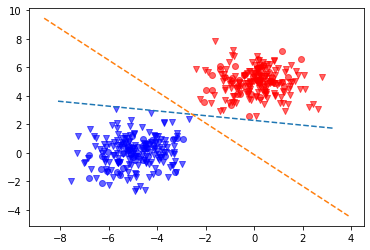

In [ ]:
import matplotlib.pyplot as plt
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
plt.scatter(train_set_x[160:,0], train_set_x[160:,1],c='red',marker='v',alpha=0.6)
plt.scatter(train_set_x[0:160,0], train_set_x[0:160,1],c='blue',marker='v',alpha=0.6)
plt.scatter(test_set_x[40:,0], test_set_x[40:,1],c='red',alpha=0.6)
plt.scatter(test_set_x[0:40,0], test_set_x[0:40,1],c='blue',alpha=0.6)
abline(-model.W[0]/model.W[1],-model.W[2]/model.W[1])
abline(-W_dagger[0]/W_dagger[1],-W_dagger[2]/W_dagger[1])
plt.show()

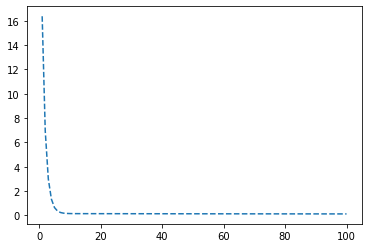

In [ ]:
plt.plot(list(range(1,101)),model.loss,'--')
plt.show()

# Problem 3 改变数据

In [ ]:
train_set_x,train_set_y,test_set_x,test_set_y = gen_data(1,1,0,1,0,1,1,1)
model = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model.train(100,20,0)
model.test()

Accuracy = 0.771875
Test Result:
Loss = 0.6843619905572456
Accuracy = 0.7625


In [ ]:
W_dagger = model.gerneral_inverse()

Generalized Inverse Test Result:
Loss = 0.6833644471994412
W = [ 0.39302548 -0.27869143 -0.03342855]
Accuracy = 0.75


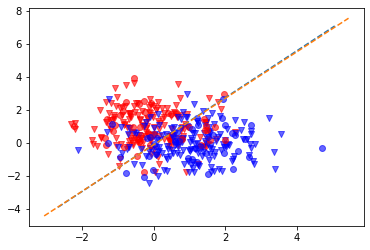

In [ ]:
import matplotlib.pyplot as plt
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
plt.scatter(train_set_x[160:,0], train_set_x[160:,1],c='red',marker='v',alpha=0.6)
plt.scatter(train_set_x[0:160,0], train_set_x[0:160,1],c='blue',marker='v',alpha=0.6)
plt.scatter(test_set_x[40:,0], test_set_x[40:,1],c='red',alpha=0.6)
plt.scatter(test_set_x[0:40,0], test_set_x[0:40,1],c='blue',alpha=0.6)
abline(-model.W[0]/model.W[1],-model.W[2]/model.W[1])
abline(-W_dagger[0]/W_dagger[1],-W_dagger[2]/W_dagger[1])
plt.show()

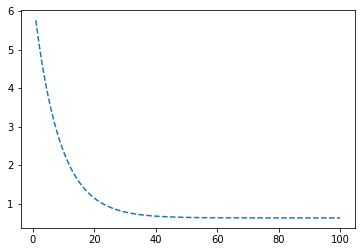

In [ ]:
plt.plot(list(range(1,101)),model.loss,'--')
plt.show()

# Problem 4 改变超参数 & 讨论

In [ ]:
train_set_x,train_set_y,test_set_x,test_set_y = gen_data(-5,1,0,1,0,1,5,1)

## 讨论batch size对模型的影响


Accuracy = 0.996875
Test Result:
Loss = 0.16357335032366696
Accuracy = 1.0
Accuracy = 0.996875
Test Result:
Loss = 0.16269240310670516
Accuracy = 1.0
Accuracy = 0.996875
Test Result:
Loss = 0.15639999410555852
Accuracy = 1.0
Accuracy = 0.996875
Test Result:
Loss = 0.14012001286409573
Accuracy = 1.0
Accuracy = 1.0
Test Result:
Loss = 0.12064281844938597
Accuracy = 1.0
Accuracy = 1.0
Test Result:
Loss = 0.09928631406993572
Accuracy = 1.0
Accuracy = 1.0
Test Result:
Loss = 0.08057346861251734
Accuracy = 1.0
Accuracy = 1.0
Test Result:
Loss = 0.08186827543684956
Accuracy = 1.0


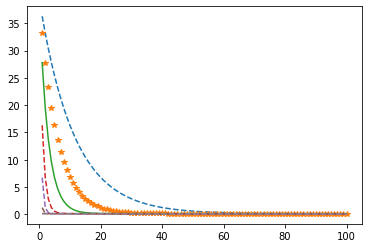

In [ ]:
model_200 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model_200.train(100,200,0)
model_200.test()

model_100 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model_100.train(100,100,0)
model_100.test()

model_50 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model_50.train(100,50,0)
model_50.test()

model_20 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model_20.train(100,20,0)
model_20.test()

model_10 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model_10.train(100,10,0)
model_10.test()

model_5 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model_5.train(100,5,0)
model_5.test()

model_2 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model_2.train(100,2,0)
model_2.test()

model_1 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model_1.train(100,1,0)
model_1.test()

plt.plot(list(range(1,101)),model_200.loss,'--')
plt.plot(list(range(1,101)),model_100.loss,'*')
plt.plot(list(range(1,101)),model_50.loss)
plt.plot(list(range(1,101)),model_20.loss,'--')
plt.plot(list(range(1,101)),model_10.loss,'--')
plt.plot(list(range(1,101)),model_5.loss,'--')
plt.plot(list(range(1,101)),model_2.loss,'--')
plt.plot(list(range(1,101)),model_1.loss,'--')

plt.show()

我们可以看到，随着batch size的降低，模型的损失函数收敛到较小值的速度较低，且模型的accuracy也随之提高。

这验证了我们的理论，即小的batch size的模型泛化能力和优化性能都比大batch size要好。

## 讨论学习率对模型的影响

----------eta = 0.01------------
Accuracy = 0.0
Test Result:
Loss = nan
Accuracy = 0.0
----------eta = 0.01------------
Accuracy = 1.0
Test Result:
Loss = 0.07998777027426866
Accuracy = 1.0
----------eta = 0.001------------
Accuracy = 0.996875
Test Result:
Loss = 0.1401751440755528
Accuracy = 1.0
----------eta = 0.0005------------
Accuracy = 0.996875
Test Result:
Loss = 0.1535034203634811
Accuracy = 1.0
----------eta = 0.0001------------
Accuracy = 0.996875
Test Result:
Loss = 0.16373313742896645
Accuracy = 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in subtract


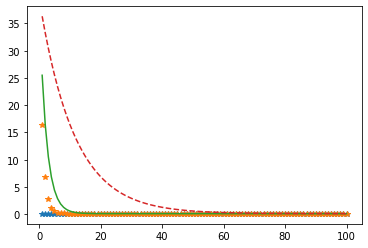

In [ ]:
print("----------eta = 0.01------------")
model_1 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.1)
model_1.train(100,20,0)
model_1.test()

print("----------eta = 0.01------------")
model_01 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.01)
model_01.train(100,20,0)
model_01.test()

print("----------eta = 0.001------------")
model_001 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model_001.train(100,20,0)
model_001.test()

print("----------eta = 0.0005------------")
model_0005 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.0005)
model_0005.train(100,20,0)
model_0005.test()

print("----------eta = 0.0001------------")
model_0001 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.0001)
model_0001.train(100,20,0)
model_0001.test()

plt.plot(list(range(1,101)),model_01.loss,'*-')
plt.plot(list(range(1,101)),model_001.loss,'*')
plt.plot(list(range(1,101)),model_0005.loss)
plt.plot(list(range(1,101)),model_0001.loss,'--')

plt.show()

可以看到，在当前数据模型上，使用随机梯度下降法的学习率越大，损失函数收敛到较小值的速度就越快；但是当学习率过大（如为0.1时），损失函数的值会越来越大。

# Problem 5 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x * np.cos(0.25 * 3.14159265 * x)
def grad_f(x):
    return np.cos(0.25 * 3.14159265 * x) - x * 0.25 * 3.14159265 * np.sin(0.25 * 3.14159265 * x)
def GD(ini_value,iter_max,eta):
    x = ini_value
    x_history = []
    for iter in range(iter_max):
        x_history.append(x)
        x = x - eta * grad_f(x)
    plt.plot(range(iter_max),x_history)
def Adagrad(ini_value,iter_max,eta):
    x = ini_value
    x_history = []
    gradient_sum = 0
    for iter in range(iter_max):
        x_history.append(x)
        gradient = grad_f(x)
        gradient_sum = gradient_sum + gradient
        sigma_t = np.sqrt(1.0/(iter+1)*gradient_sum * gradient_sum) + 0.000001
        x = x - eta / sigma_t * gradient
    plt.plot(range(iter_max),x_history)
def RMSProp(ini_value,iter_max,eta,alpha):
    x = ini_value
    x_history = []
    gradient_sum = 0
    for iter in range(iter_max):
        x_history.append(x)
        gradient = grad_f(x)
        sigma_t_1 = np.sqrt(1.0/(iter+1) * gradient_sum * gradient_sum)
        sigma_t = np.sqrt(alpha * sigma_t_1 * sigma_t_1 + (1.0 - alpha) * gradient * gradient) + 0.000001
        gradient_sum = gradient_sum + gradient
        x = x - eta / sigma_t * gradient
    plt.plot(range(iter_max),x_history)
def Momentom(ini_value,iter_max,eta,p_lamb):
    x = ini_value
    x_history = []
    m = 0
    for iter in range(iter_max):
        x_history.append(x)
        gradient = grad_f(x)
        m = p_lamb * m - eta * gradient
        x = x + m
    plt.plot(range(iter_max),x_history)
def Adam(ini_value,iter_max,eta,beta_1,beta_2):
    x = ini_value
    x_history = []
    m = 0
    v = 0
    for iter in range(iter_max):
        x_history.append(x)
        gradient = grad_f(x)
        m = beta_1 * m + (1-beta_1) * gradient
        v = beta_2 * v + (1-beta_2) * gradient * gradient
        m_hat = m / (1 - beta_1 ** (iter + 1))
        v_hat = v / (1 - beta_2 ** (iter + 1))
        x = x - eta * m_hat / (np.sqrt(v_hat) + 0.000001)
    plt.plot(range(iter_max),x_history)




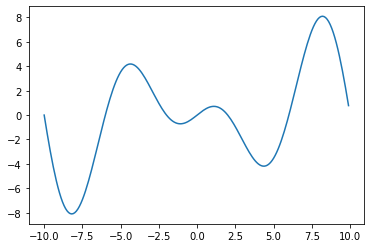

In [ ]:
x = np.arange(-10, 10, 0.1)
y = f(x)
plt.plot(x, y)
plt.show()

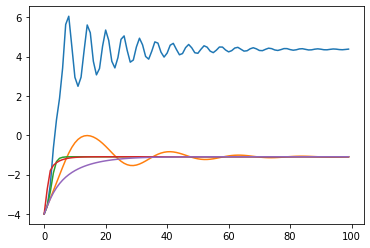

In [ ]:
Momentom(-4,100,0.4,0.9)
Adam(-4,100,0.4,0.9,0.999)
GD(-4,100,0.4)
RMSProp(-4,100,0.4,0.9)
Adagrad(-4,100,0.4)
plt.show()

我们可以看到，除了动量法之外的方法都陷入了约-1.8附近的这个局部最小值，只有动量法到达了4附近的更小的极值点。

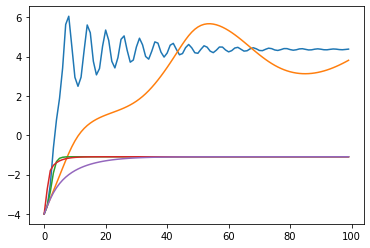

In [ ]:
Momentom(-4,100,0.4,0.9)
Adam(-4,100,0.4,0.99,0.999)
GD(-4,100,0.4)
RMSProp(-4,100,0.4,0.9)
Adagrad(-4,100,0.4)
plt.show()

将Adam的beta1改为0.99后，Adam也能够跳出约-1.8处的局部极小值，达到更远处。并且我们可以发现，除了动量法和Adam之外，SGD，Adagrad都不能跳出局部极小值。相对于动量法，Adam的过渡较为平缓。